In [1]:
%cd ../
%matplotlib inline

/home/zulqarnain/run_all_htfa/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.utils as utils

In [3]:
import glob

dataset_directory = '/home/zulqarnain/Datasets/new_pieman/pieman_data_intact/'
data_files = glob.glob(dataset_directory + '*intact1.nii')


In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(data_files[:], num_factors=10,
                                                  mask='/home/zulqarnain/Datasets/new_pieman/pieman_data_intact/wholebrain_intact1.nii.gz')

In [6]:
prior_sample, _ = htfa.sample(posterior_predictive=False)

for s in range(htfa.num_subjects):
    logging.info('Prior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            prior_sample['Y%d' % s].value.data.cpu().numpy() - htfa.voxel_activations[s].numpy()
        )
    )

prior_sample

04/10/2018 12:22:19 Prior Reconstruction Error (Frobenius Norm) for subject 0: 4.62677148e+03
04/10/2018 12:22:19 Prior Reconstruction Error (Frobenius Norm) for subject 1: 4.62688232e+03
04/10/2018 12:22:19 Prior Reconstruction Error (Frobenius Norm) for subject 2: 4.62824268e+03
04/10/2018 12:22:19 Prior Reconstruction Error (Frobenius Norm) for subject 3: 4.62752246e+03
04/10/2018 12:22:19 Prior Reconstruction Error (Frobenius Norm) for subject 4: 4.62801025e+03
04/10/2018 12:22:20 Prior Reconstruction Error (Frobenius Norm) for subject 5: 4.62743701e+03
04/10/2018 12:22:20 Prior Reconstruction Error (Frobenius Norm) for subject 6: 4.62713232e+03
04/10/2018 12:22:20 Prior Reconstruction Error (Frobenius Norm) for subject 7: 4.62725146e+03
04/10/2018 12:22:20 Prior Reconstruction Error (Frobenius Norm) for subject 8: 4.62694775e+03
04/10/2018 12:22:20 Prior Reconstruction Error (Frobenius Norm) for subject 9: 4.62721143e+03
04/10/2018 12:22:20 Prior Reconstruction Error (Frobenius No

Trace{'template_factor_centers': Normal([torch.FloatTensor of size 10x3]), 'template_factor_log_widths': Normal([torch.FloatTensor of size 10]), 'voxel_noise': Normal([torch.FloatTensor of size 18]), 'Weights0': Normal([torch.FloatTensor of size 300x10]), 'FactorCenters0': Normal([torch.FloatTensor of size 10x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 10]), 'Weights1': Normal([torch.FloatTensor of size 300x10]), 'FactorCenters1': Normal([torch.FloatTensor of size 10x3]), 'FactorLogWidths1': Normal([torch.FloatTensor of size 10]), 'Weights2': Normal([torch.FloatTensor of size 300x10]), 'FactorCenters2': Normal([torch.FloatTensor of size 10x3]), 'FactorLogWidths2': Normal([torch.FloatTensor of size 10]), 'Weights3': Normal([torch.FloatTensor of size 300x10]), 'FactorCenters3': Normal([torch.FloatTensor of size 10x3]), 'FactorLogWidths3': Normal([torch.FloatTensor of size 10]), 'Weights4': Normal([torch.FloatTensor of size 300x10]), 'FactorCenters4': Normal([torch.FloatTen

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


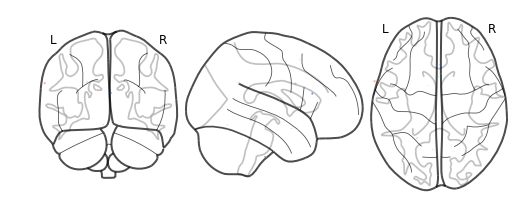

In [7]:
htfa.plot_factor_centers(trace=prior_sample)

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


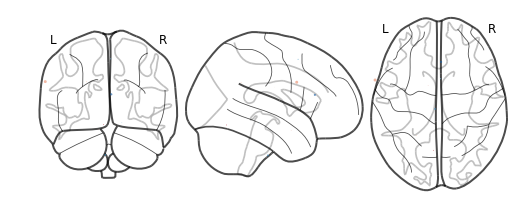

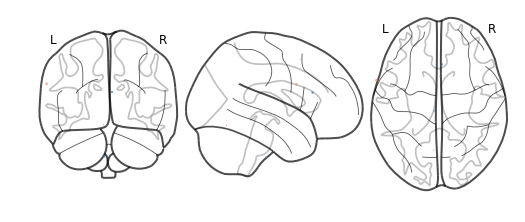

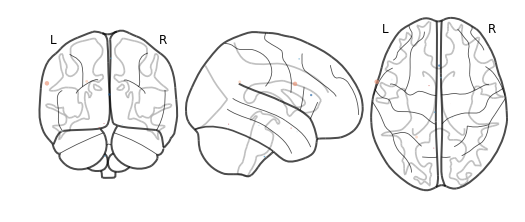

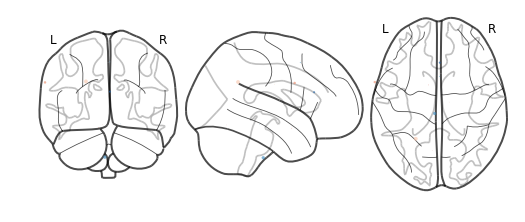

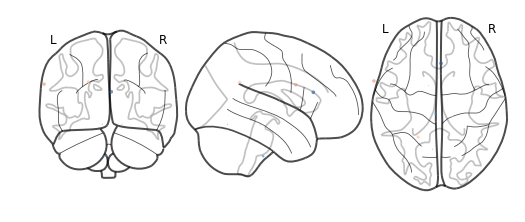

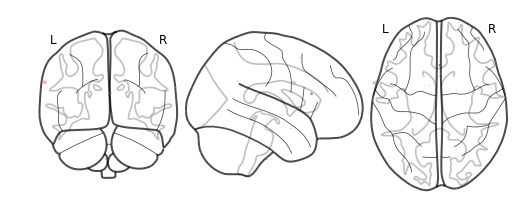

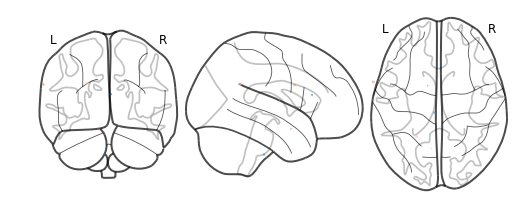

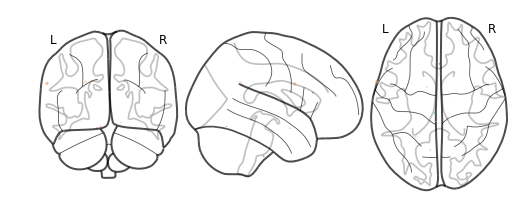

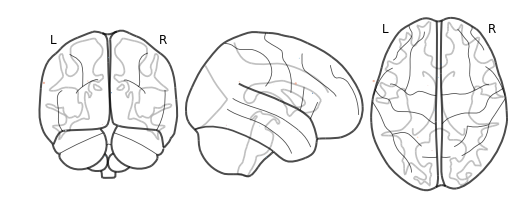

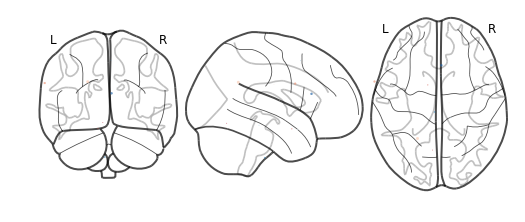

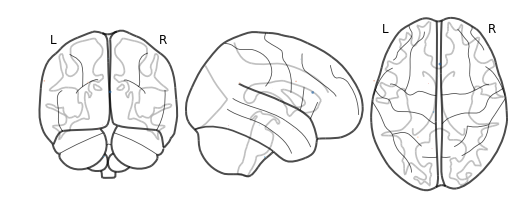

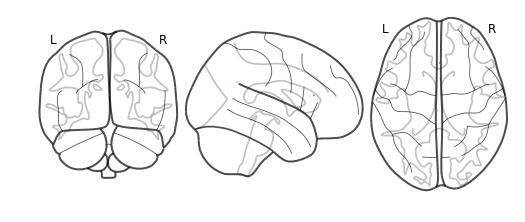

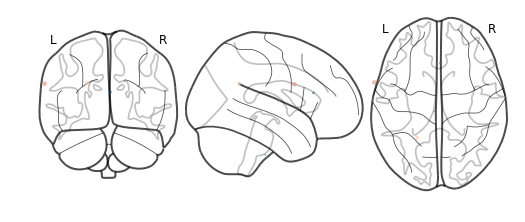

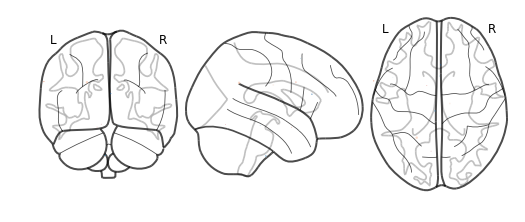

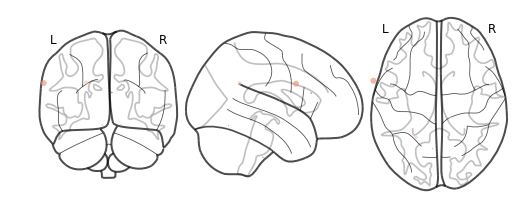

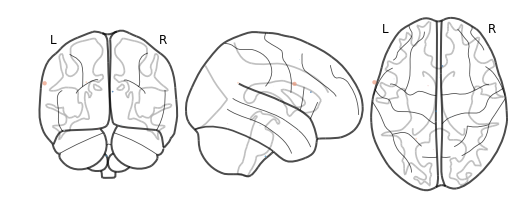

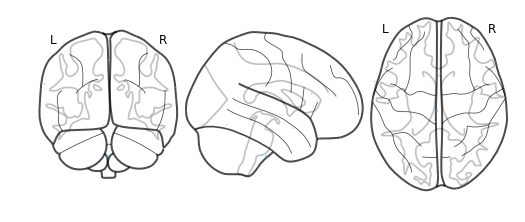

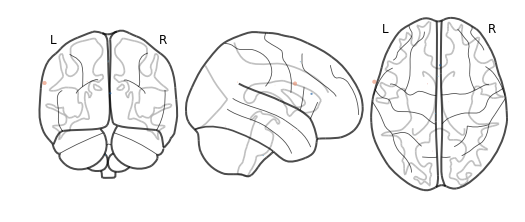

In [8]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=prior_sample)

In [9]:
del prior_sample

In [10]:
variational_sample, _ = htfa.sample(posterior_predictive=True)

for s in range(htfa.num_subjects):
    logging.info('Prior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            variational_sample['Y%d' % s].value.data.cpu().numpy() -
            htfa.voxel_activations[s].numpy()
        )
    )

variational_sample

04/10/2018 12:22:43 Prior Reconstruction Error (Frobenius Norm) for subject 0: 1.09224893e+04
04/10/2018 12:22:43 Prior Reconstruction Error (Frobenius Norm) for subject 1: 9.59732715e+03
04/10/2018 12:22:43 Prior Reconstruction Error (Frobenius Norm) for subject 2: 1.07153564e+04
04/10/2018 12:22:43 Prior Reconstruction Error (Frobenius Norm) for subject 3: 9.20644141e+03
04/10/2018 12:22:43 Prior Reconstruction Error (Frobenius Norm) for subject 4: 1.09042217e+04
04/10/2018 12:22:44 Prior Reconstruction Error (Frobenius Norm) for subject 5: 8.46210938e+03
04/10/2018 12:22:44 Prior Reconstruction Error (Frobenius Norm) for subject 6: 9.33598633e+03
04/10/2018 12:22:44 Prior Reconstruction Error (Frobenius Norm) for subject 7: 1.03906592e+04
04/10/2018 12:22:44 Prior Reconstruction Error (Frobenius Norm) for subject 8: 9.41362500e+03
04/10/2018 12:22:44 Prior Reconstruction Error (Frobenius Norm) for subject 9: 9.20325684e+03
04/10/2018 12:22:44 Prior Reconstruction Error (Frobenius No

Trace{'template_factor_centers': Normal([torch.FloatTensor of size 1x10x3]), 'template_factor_log_widths': Normal([torch.FloatTensor of size 1x10]), 'voxel_noise': Normal([torch.FloatTensor of size 1x18]), 'Weights0': Normal([torch.FloatTensor of size 1x300x10]), 'FactorCenters0': Normal([torch.FloatTensor of size 1x10x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 1x10]), 'Weights1': Normal([torch.FloatTensor of size 1x300x10]), 'FactorCenters1': Normal([torch.FloatTensor of size 1x10x3]), 'FactorLogWidths1': Normal([torch.FloatTensor of size 1x10]), 'Weights2': Normal([torch.FloatTensor of size 1x300x10]), 'FactorCenters2': Normal([torch.FloatTensor of size 1x10x3]), 'FactorLogWidths2': Normal([torch.FloatTensor of size 1x10]), 'Weights3': Normal([torch.FloatTensor of size 1x300x10]), 'FactorCenters3': Normal([torch.FloatTensor of size 1x10x3]), 'FactorLogWidths3': Normal([torch.FloatTensor of size 1x10]), 'Weights4': Normal([torch.FloatTensor of size 1x300x10]), 'FactorC

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


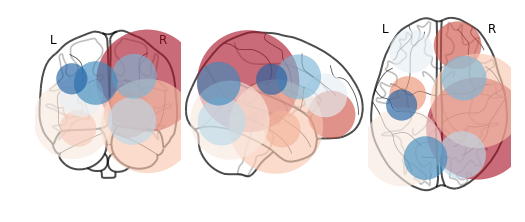

In [11]:
htfa.plot_factor_centers(trace=variational_sample)

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


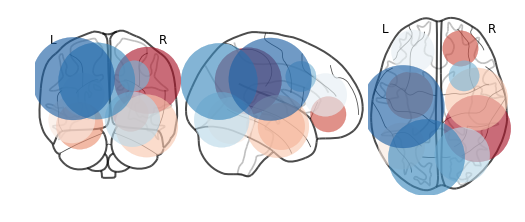

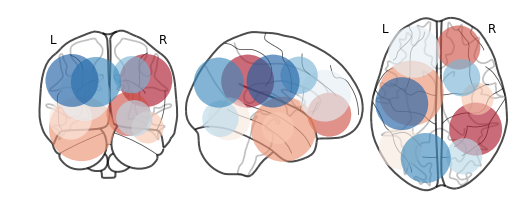

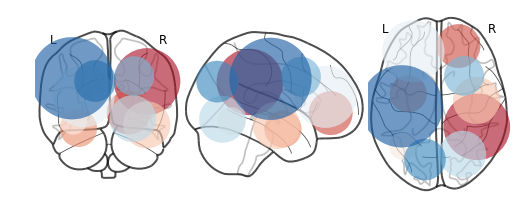

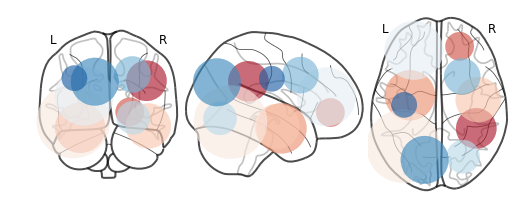

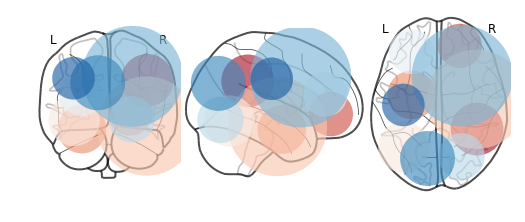

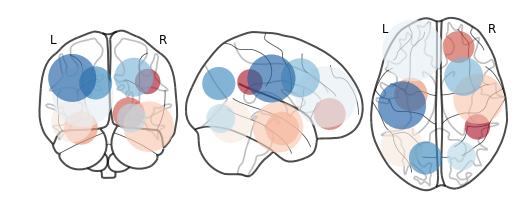

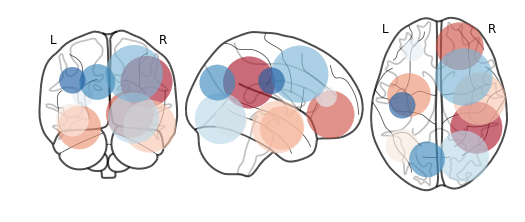

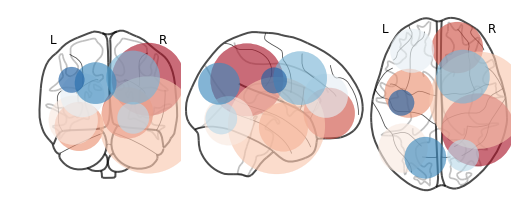

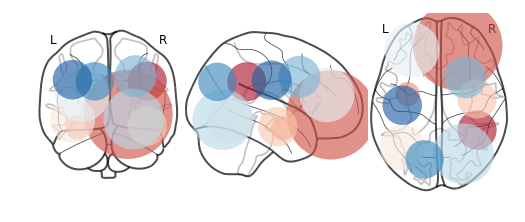

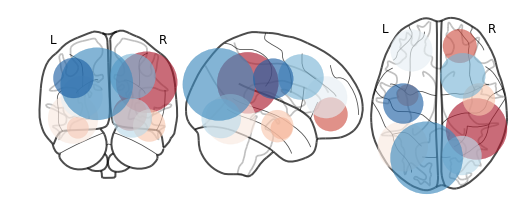

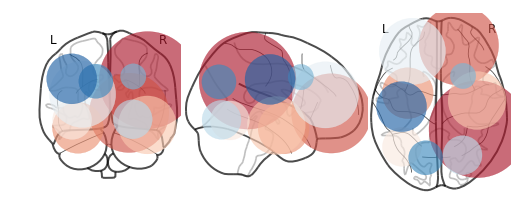

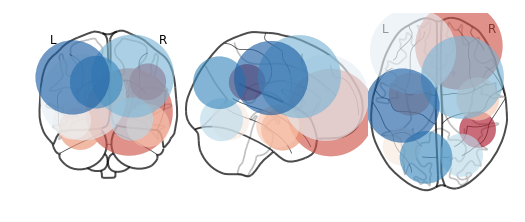

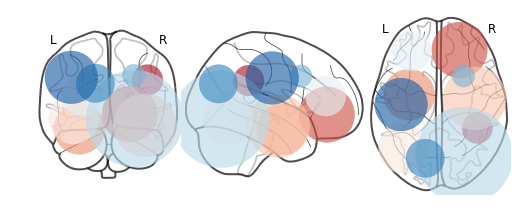

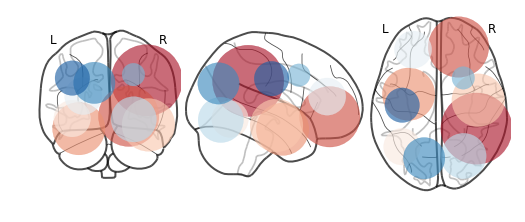

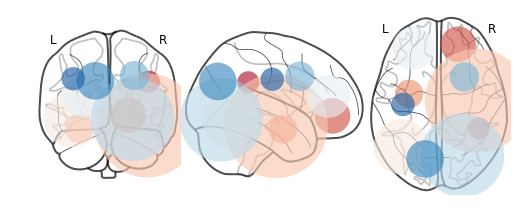

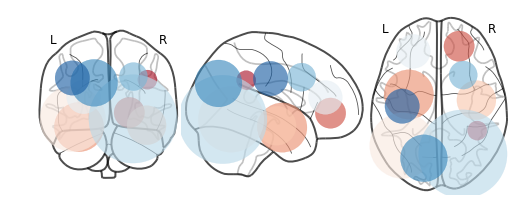

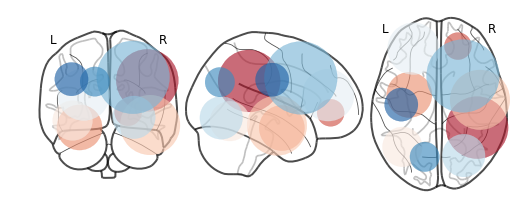

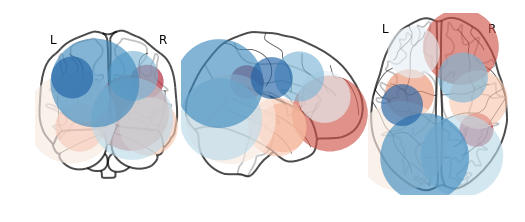

In [12]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=variational_sample)

In [13]:
del variational_sample

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


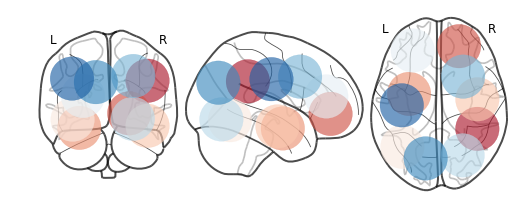

In [14]:
htfa.plot_factor_centers()

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


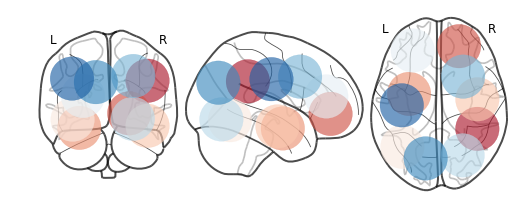

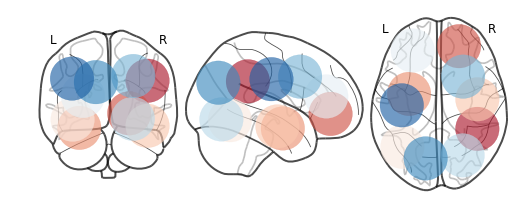

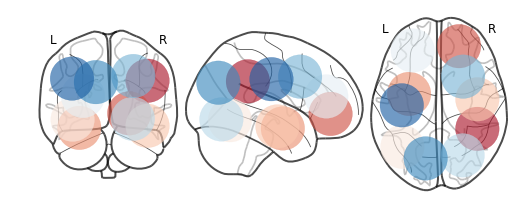

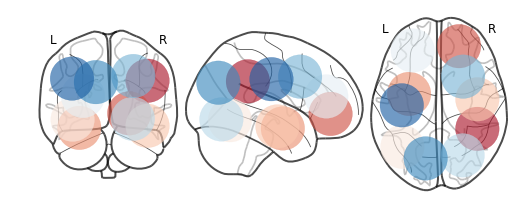

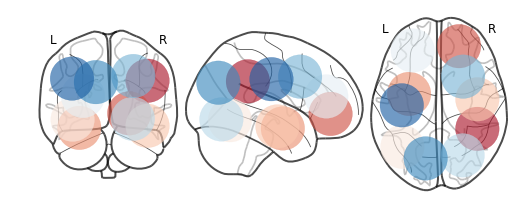

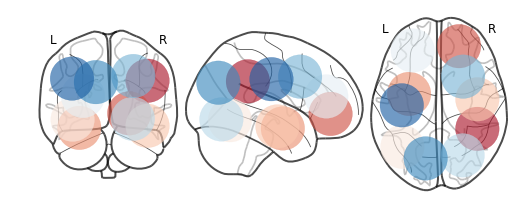

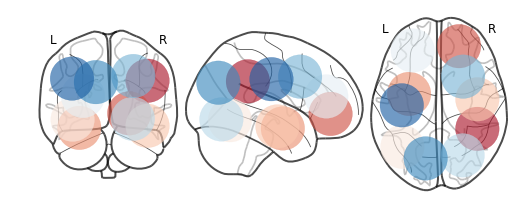

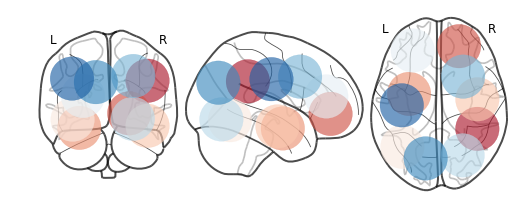

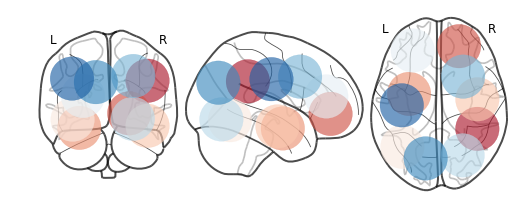

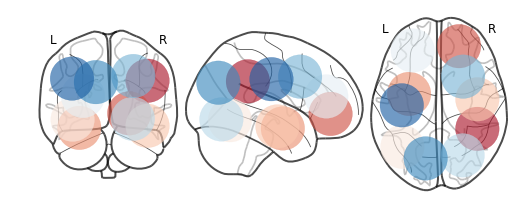

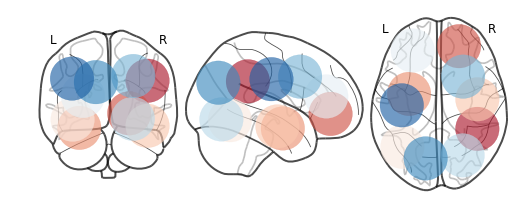

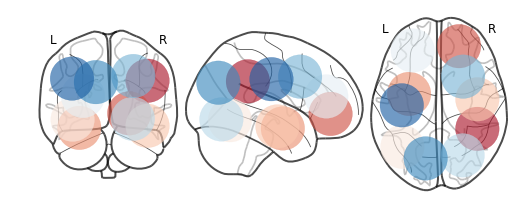

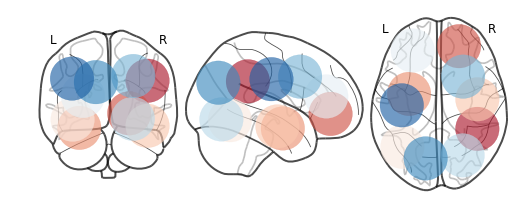

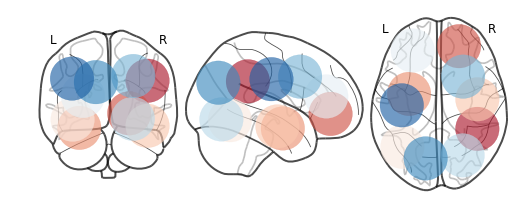

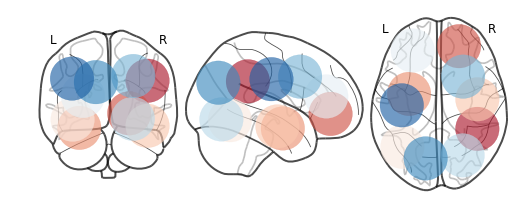

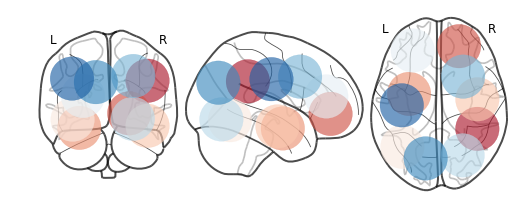

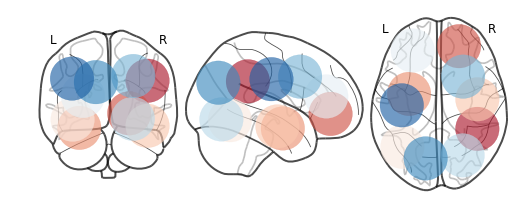

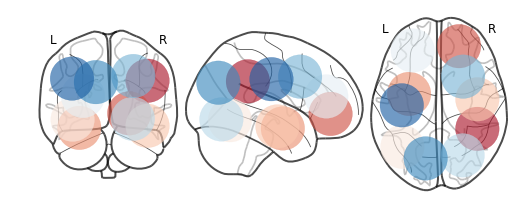

In [15]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s)

In [16]:
losses = htfa.train(num_steps=100, learning_rate=2e-1, log_level=logging.INFO, num_particles=4,batch_size=64,
                    use_cuda=True)

04/10/2018 12:23:25 [Epoch 1] (4930ms) Posterior free-energy 6.30893199e+10
04/10/2018 12:23:30 [Epoch 2] (5317ms) Posterior free-energy 2.81496412e+10
04/10/2018 12:23:34 [Epoch 3] (4536ms) Posterior free-energy 2.11563356e+10
04/10/2018 12:23:39 [Epoch 4] (5035ms) Posterior free-energy 1.93578619e+10
04/10/2018 12:23:45 [Epoch 5] (5096ms) Posterior free-energy 1.87706982e+10
04/10/2018 12:23:50 [Epoch 6] (5108ms) Posterior free-energy 1.85114010e+10
04/10/2018 12:23:55 [Epoch 7] (4943ms) Posterior free-energy 1.83879250e+10
04/10/2018 12:24:00 [Epoch 8] (5526ms) Posterior free-energy 1.82875218e+10
04/10/2018 12:24:05 [Epoch 9] (5106ms) Posterior free-energy 1.82218977e+10
04/10/2018 12:24:10 [Epoch 10] (4945ms) Posterior free-energy 1.81758894e+10
04/10/2018 12:24:15 [Epoch 11] (4941ms) Posterior free-energy 1.81279498e+10
04/10/2018 12:24:20 [Epoch 12] (4861ms) Posterior free-energy 1.80647137e+10
04/10/2018 12:24:25 [Epoch 13] (5066ms) Posterior free-energy 1.79880530e+10
04/10/20

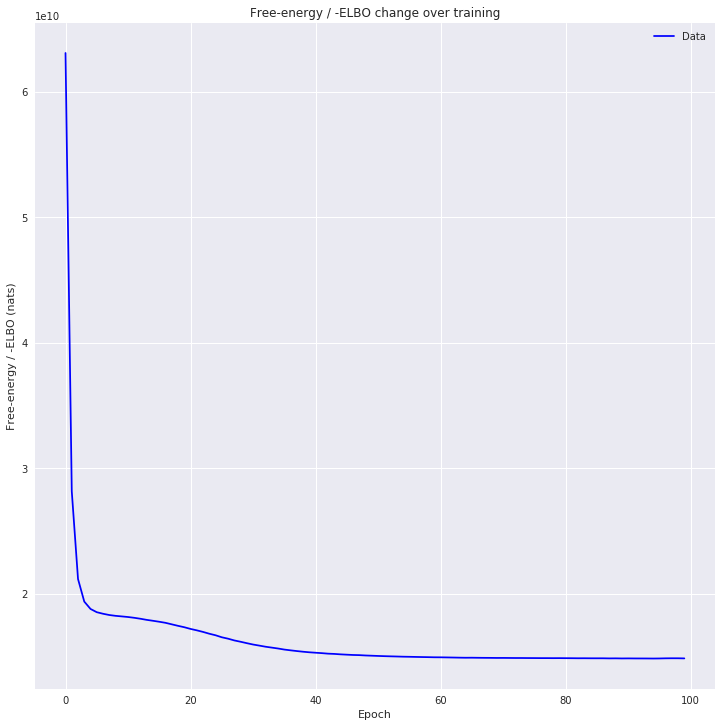

In [17]:
utils.plot_losses(losses)

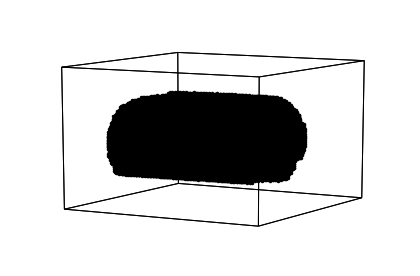

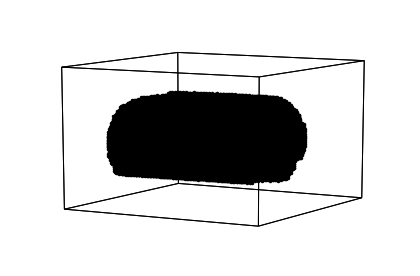

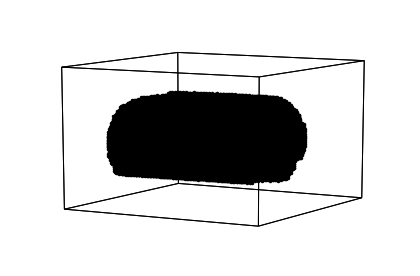

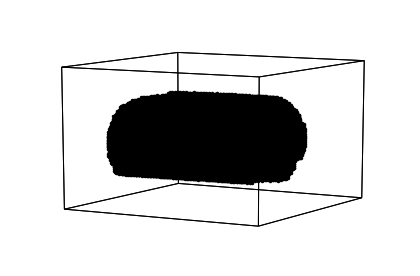

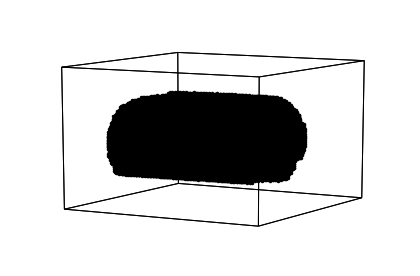

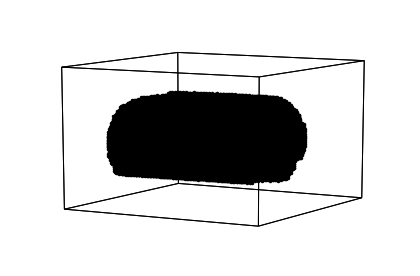

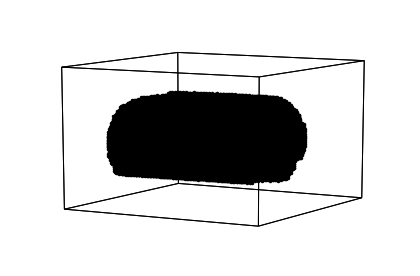

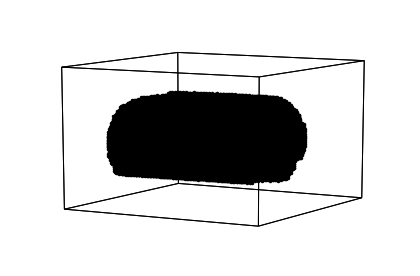

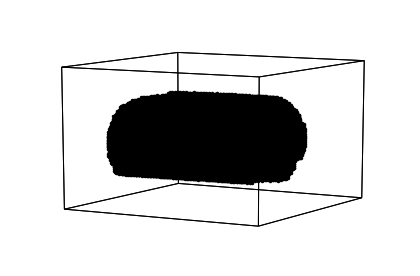

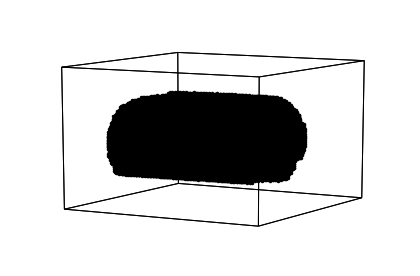

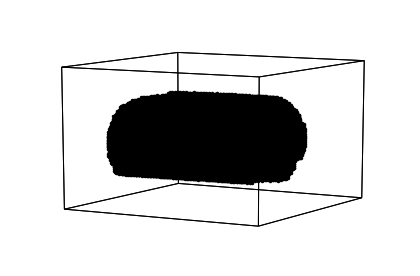

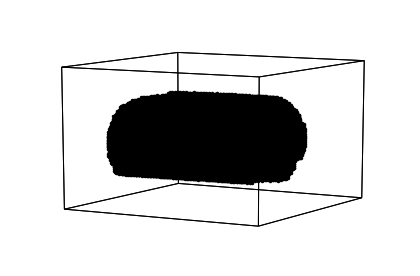

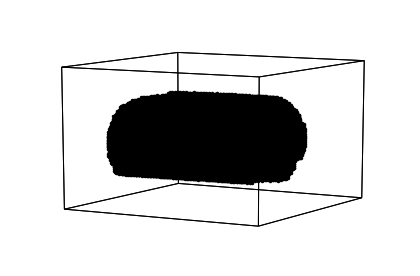

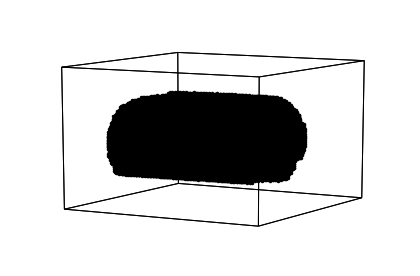

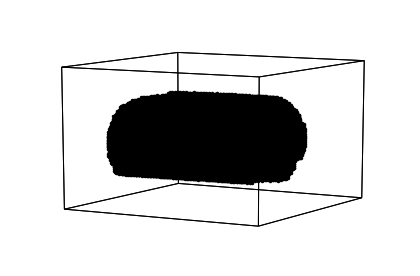

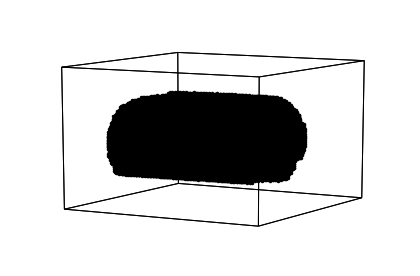

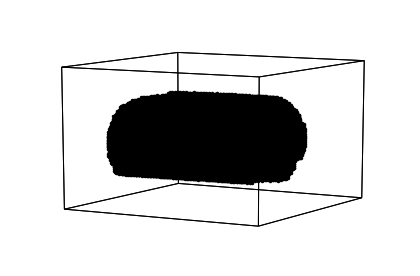

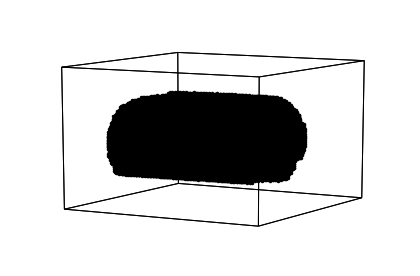

In [18]:
htfa.plot_voxels()

In [19]:
posterior_sample, q = htfa.sample(posterior_predictive=True)

for s in range(htfa.num_subjects):
    logging.info('Posterior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            posterior_sample['Y%d' % s].value.data.cpu().numpy() - htfa.voxel_activations[s].numpy()
        )
    )

posterior_sample

04/10/2018 12:31:50 Posterior Reconstruction Error (Frobenius Norm) for subject 0: 4.29031299e+03
04/10/2018 12:31:50 Posterior Reconstruction Error (Frobenius Norm) for subject 1: 4.10140918e+03
04/10/2018 12:31:50 Posterior Reconstruction Error (Frobenius Norm) for subject 2: 4.15172656e+03
04/10/2018 12:31:50 Posterior Reconstruction Error (Frobenius Norm) for subject 3: 4.06408154e+03
04/10/2018 12:31:50 Posterior Reconstruction Error (Frobenius Norm) for subject 4: 4.35662061e+03
04/10/2018 12:31:50 Posterior Reconstruction Error (Frobenius Norm) for subject 5: 4.20632764e+03
04/10/2018 12:31:50 Posterior Reconstruction Error (Frobenius Norm) for subject 6: 4.08430908e+03
04/10/2018 12:31:51 Posterior Reconstruction Error (Frobenius Norm) for subject 7: 4.25025488e+03
04/10/2018 12:31:51 Posterior Reconstruction Error (Frobenius Norm) for subject 8: 4.18585205e+03
04/10/2018 12:31:51 Posterior Reconstruction Error (Frobenius Norm) for subject 9: 4.27573340e+03
04/10/2018 12:31:51 

Trace{'template_factor_centers': Normal([torch.FloatTensor of size 1x10x3]), 'template_factor_log_widths': Normal([torch.FloatTensor of size 1x10]), 'voxel_noise': Normal([torch.FloatTensor of size 1x18]), 'Weights0': Normal([torch.FloatTensor of size 1x300x10]), 'FactorCenters0': Normal([torch.FloatTensor of size 1x10x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 1x10]), 'Weights1': Normal([torch.FloatTensor of size 1x300x10]), 'FactorCenters1': Normal([torch.FloatTensor of size 1x10x3]), 'FactorLogWidths1': Normal([torch.FloatTensor of size 1x10]), 'Weights2': Normal([torch.FloatTensor of size 1x300x10]), 'FactorCenters2': Normal([torch.FloatTensor of size 1x10x3]), 'FactorLogWidths2': Normal([torch.FloatTensor of size 1x10]), 'Weights3': Normal([torch.FloatTensor of size 1x300x10]), 'FactorCenters3': Normal([torch.FloatTensor of size 1x10x3]), 'FactorLogWidths3': Normal([torch.FloatTensor of size 1x10]), 'Weights4': Normal([torch.FloatTensor of size 1x300x10]), 'FactorC

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


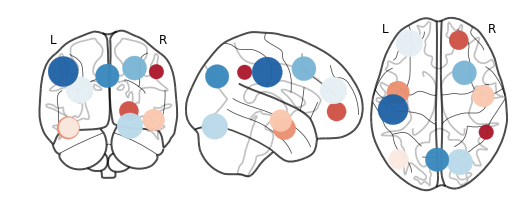

In [20]:
htfa.plot_factor_centers(trace=posterior_sample)

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


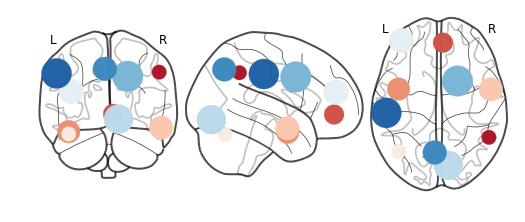

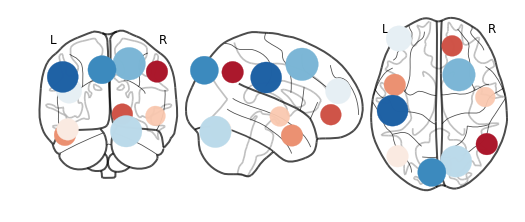

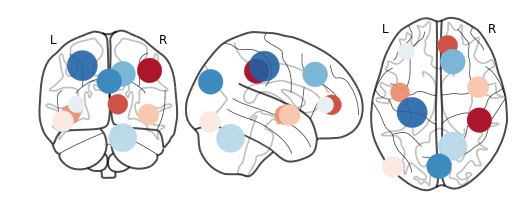

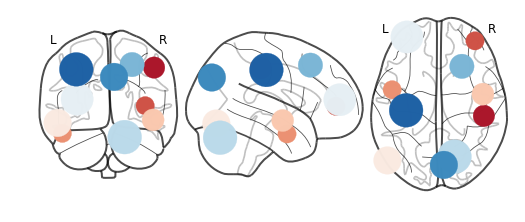

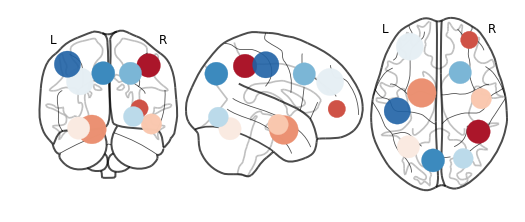

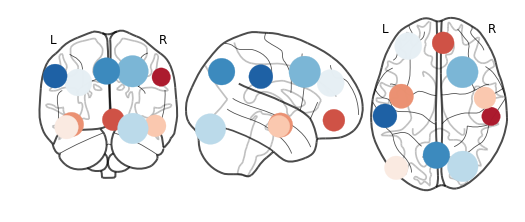

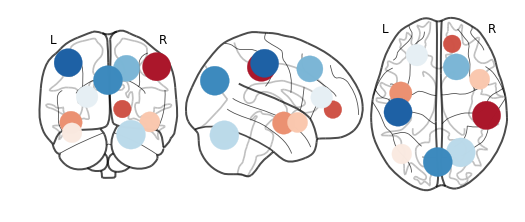

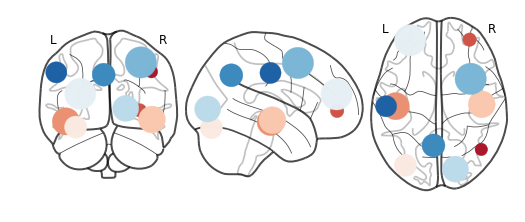

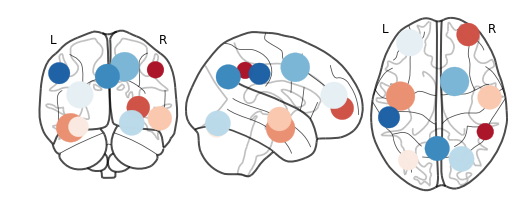

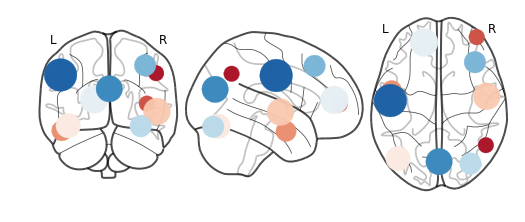

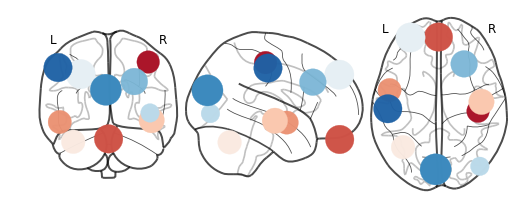

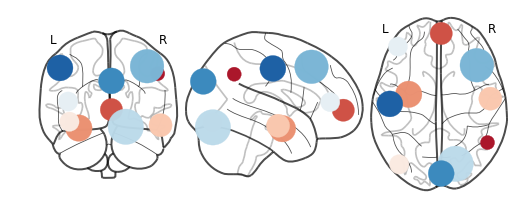

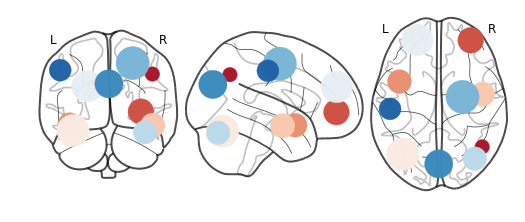

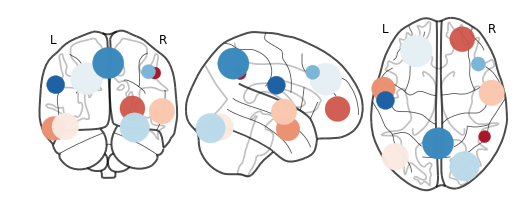

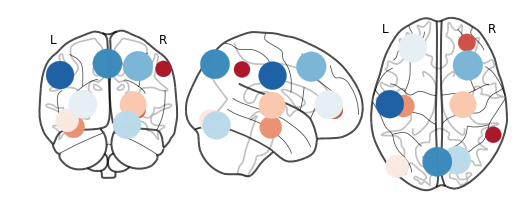

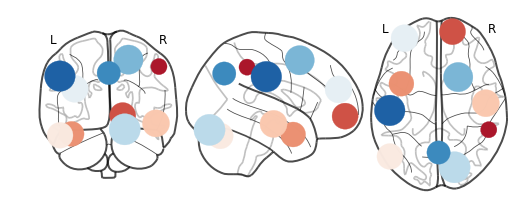

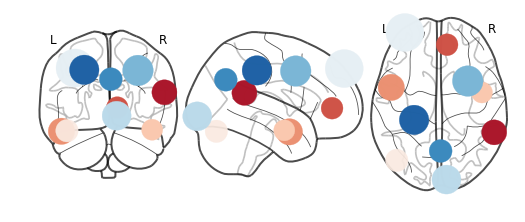

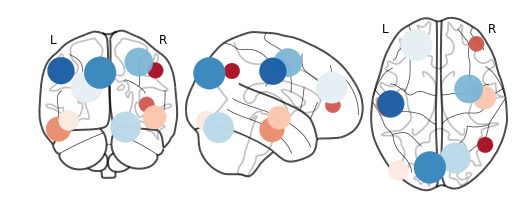

In [21]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=posterior_sample)

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


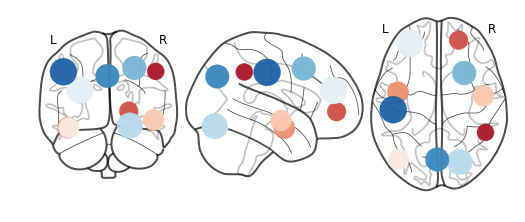

In [22]:
htfa.plot_factor_centers()

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


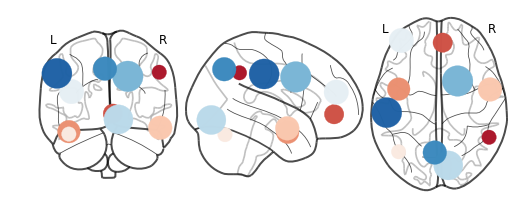

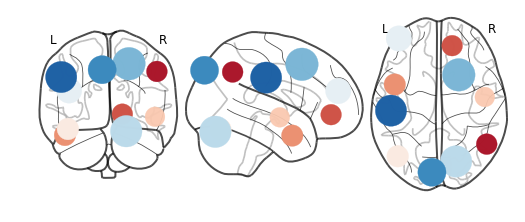

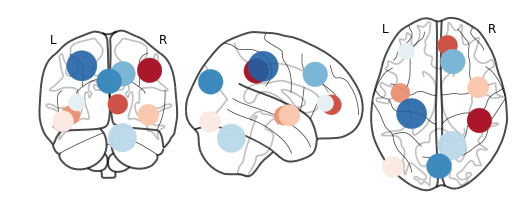

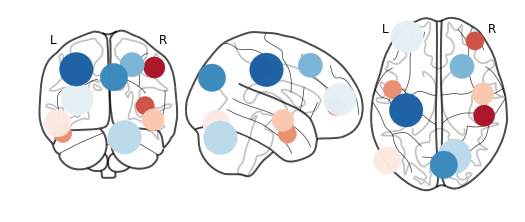

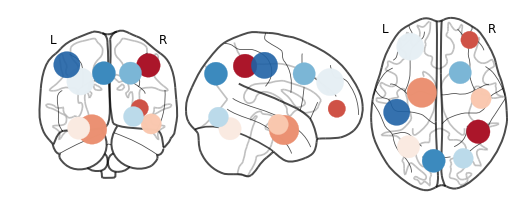

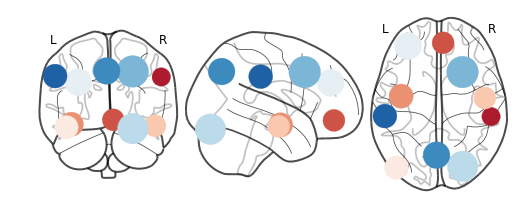

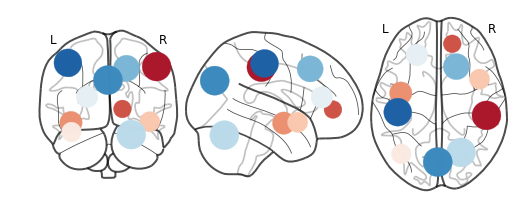

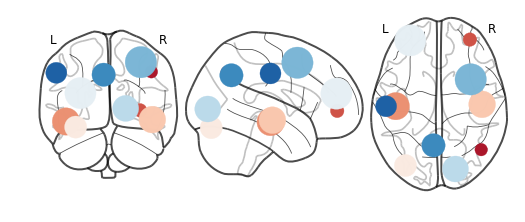

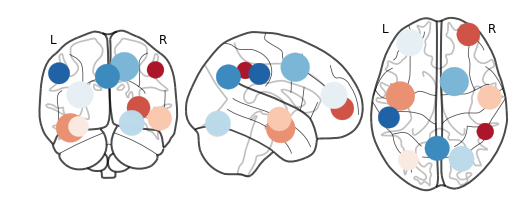

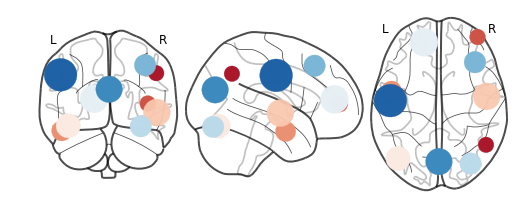

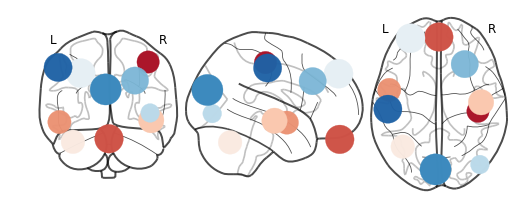

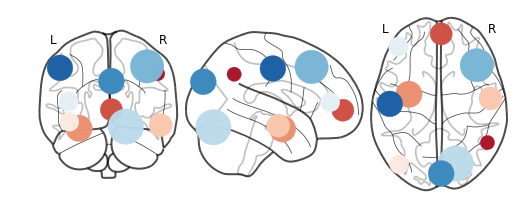

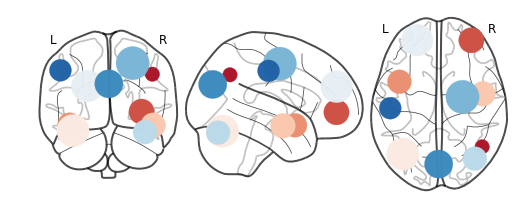

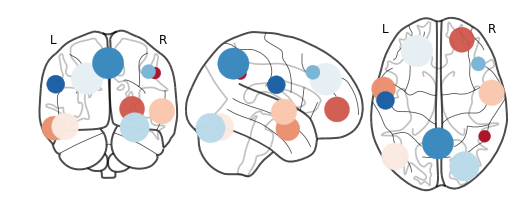

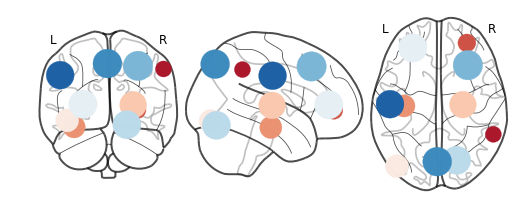

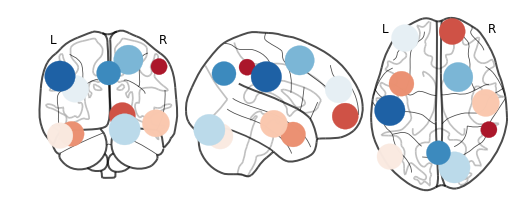

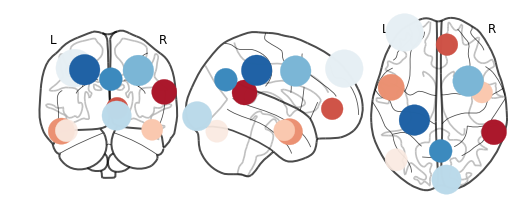

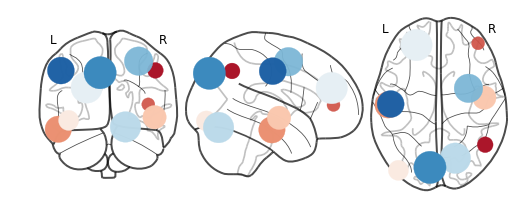

In [23]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s)